# Prepare

In [59]:
# pip list
import tensorflow as tf
import cv2 # openCV for real time computer vision
import imghdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential # great for one data input and one data output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

## Remove bad images

In [2]:
data_dir = "data"
image_exts = ['jpeg','jpg', 'bmp', 'png']

bikes_dir = os.listdir("data")[1:] # list all the directories inside the data folder
motorcycle = os.listdir(os.path.join("data", "motorcycle")) # find the list of all images in each data folder
bicycle = os.listdir(os.path.join("data", "bicycle")) # find the list of all images in each data folder

print("original bicycle length:",len(bicycle))
print("original motorcycle length:",len(motorcycle))

original bicycle length: 76
original motorcycle length: 82


In [3]:
for direct in bikes_dir:
    img_arr = pd.Series(os.listdir(os.path.join(data_dir, direct))) # atempt to rmove .ipynb_checkpoints from list of images
    for img in list(img_arr[~img_arr.isin([".ipynb_checkpoints"])]): # find the list of all images in each data folder
        img_path = os.path.join(data_dir,direct, img) # join full image path together
        try:
            image = cv2.imread(img_path) # read image as np array
            tip = imghdr.what(img_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except:
            print('Issue with image {}'.format(img_path))

motorcycle = os.listdir(os.path.join("data", "motorcycle")) # find the list of all images in each data folder
bicycle = os.listdir(os.path.join("data", "bicycle")) # find the list of all images in each data folder
print("original bicycle length:",len(bicycle))
print("original motorcycle length:",len(motorcycle))

original bicycle length: 76
original motorcycle length: 82


**image to array example**

In [4]:
# example reading image as np array
img_arr_ex = cv2.imread(os.path.join("data", "bicycle","000019.jpg"))
img_arr_ex[1]

array([[184, 168, 162],
       [208, 192, 186],
       [230, 214, 208],
       ...,
       [  4,  15,  13],
       [  2,  13,  11],
       [  0,  12,  10]], dtype=uint8)

In [5]:
# 1167 pixels high
# 2000 pixels wide
# 3 chanels (colored picture)
img_arr_ex.shape

(1333, 2000, 3)

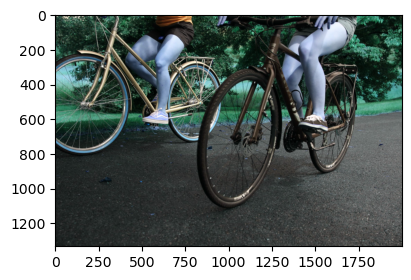

In [6]:
# plot the image
plt.figure(figsize = (5,3))
plt.imshow(img_arr_ex)
plt.show()

**fix color**

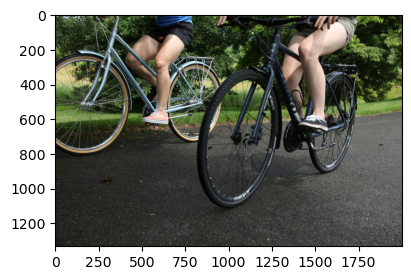

In [7]:
# plot the image
plt.figure(figsize = (5,3))
plt.imshow(cv2.cvtColor(img_arr_ex, cv2.COLOR_BGR2RGB))
plt.show()

## Load data

In [8]:
# Build image dataset using keras image data set 
data = tf.keras.utils.image_dataset_from_directory("data") # data is the directory whre the image files are located
# bikes = np.copy(data)

Found 158 files belonging to 2 classes.


In [9]:
# convert the image dataset object to numpy arrays using an iterator
data_iterator = data.as_numpy_iterator()
data_iterator # you can loop through this iterator and get baches of data using the numpy next operator

**Batch return s two things:**

- The images
- The label: Determins if an image is a bicycle or a motorcycle (0,1)

In [10]:
# use the next operator to get a batch of data
batch = data_iterator.next()

2023-08-26 21:55:57.670522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


**Images**

Each batch contains 32 images and contrain a consistance image size of 256 pixels and colored images

In [11]:
# get all the images from the batch
batch[0].shape
# each batch contains 32 images and contrain a consistance image size of 256 pixels and colored images

(32, 256, 256, 3)

**labels**

Which number represent bicycle and which represent motorcycle?
- `0`: Bicycle 
- `1`: Motorcyle

In [12]:
batch[1]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int32)

In [13]:
data.class_names

['bicycle', 'motorcycle']

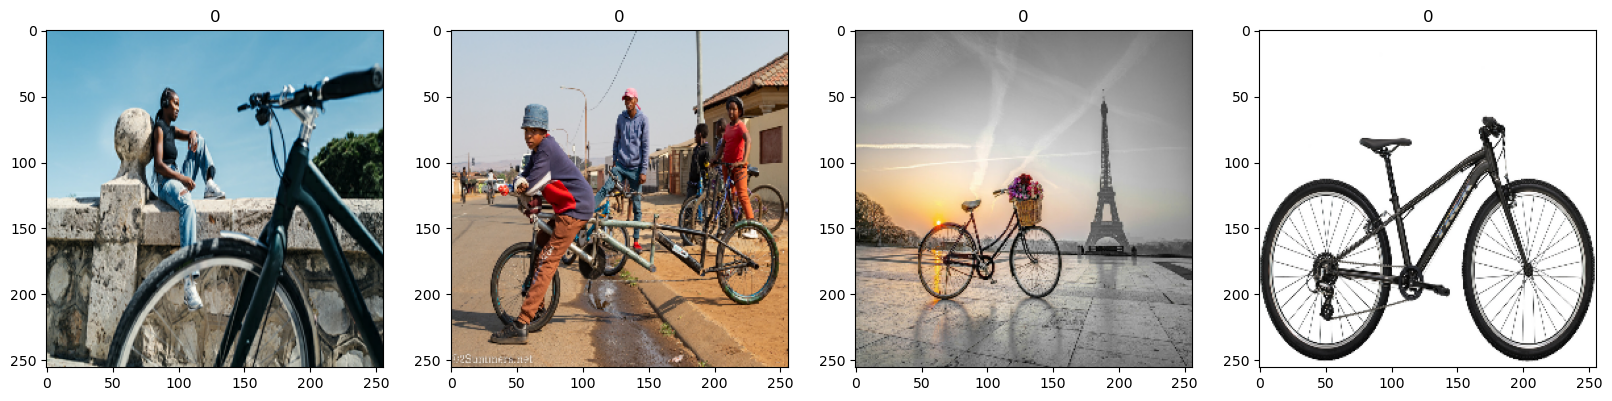

In [14]:
# determin wheater a image is motorcycle or bicycle
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling

In [18]:
# devide by 255 pixels
data = data.map(lambda x,y: (x/255, y))

# Get an iterator over the dataset
data.as_numpy_iterator().next()

# Get the first element from the iterator
# data = next(data_iterator)

2023-08-26 21:57:37.701668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[4.22382085e-09, 4.22382085e-09, 4.22382085e-09],
          [4.02057543e-09, 4.02057543e-09, 4.02057543e-09],
          [4.20164925e-09, 4.20164925e-09, 4.20164925e-09],
          ...,
          [4.25708002e-09, 4.25708002e-09, 4.25708002e-09],
          [4.22185797e-09, 4.22185797e-09, 4.22185797e-09],
          [4.45039428e-09, 4.45039428e-09, 4.45039428e-09]],
 
         [[4.49727944e-09, 4.49727944e-09, 4.49727944e-09],
          [4.38272263e-09, 4.38272263e-09, 4.38272263e-09],
          [4.04771283e-09, 4.04771283e-09, 4.04771283e-09],
          ...,
          [4.61922678e-09, 4.61922678e-09, 4.61922678e-09],
          [5.20309751e-09, 5.20309751e-09, 5.20309751e-09],
          [4.25708002e-09, 4.25708002e-09, 4.25708002e-09]],
 
         [[4.43896209e-09, 4.43896209e-09, 4.43896209e-09],
          [4.96659336e-09, 4.96659336e-09, 4.96659336e-09],
          [4.02461753e-09, 4.02461753e-09, 4.02461753e-09],
          ...,
          [4.96659336e-09, 4.96659336e-09, 4.9665

## Split Data

In [23]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [24]:
train_size, val_size, test_size

(3, 1, 1)

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

 ## Build Deep Learning Model

In [33]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
# create a sequential mmodel
model = Sequential()

In [35]:
# The Conv2D class represents a 2D convolutional layer
# Used for feature extraction from images
# It applies convolutional filters (kernels) to input data
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

In [37]:
# The Conv2D class represents a 2D convolutional layer
# Used for feature extraction from images
# It applies convolutional filters (kernels) to input data
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [38]:
# The Dense class represents a fully connected (dense) layer
# Used for computations on entire input data
# Neurons in this layer are connected to all neurons in the previous layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [39]:
# The Flatten class represents a layer that flattens input data
# Converts multi-dimensional data to one-dimensional format
model.add(Flatten())

In [41]:
# The Dropout class represents a dropout layer
# Used for regularization to prevent overfitting
# Randomly sets a fraction of input units to zero during each update
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
# Compile the model for training
# Using the Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 conv2d_2 (Conv2D)           (None, 252, 252, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)       

## Train

In [45]:
# Set the directory where TensorBoard logs will be stored
logdir = 'logs'

# Create a TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model using the fit function
# 'train' is the training dataset, 'val' is the validation dataset
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
# You want to see the loss going down and acuracy going up

Epoch 1/20


2023-08-26 23:00:41.678031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.4792

2023-08-26 23:00:43.911804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 951ms/step - loss: 0.6946 - accuracy: 0.4792 - val_loss: 0.6951 - val_accuracy: 0.4688
Epoch 2/20


2023-08-26 23:00:44.941762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5104

2023-08-26 23:00:47.129953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 938ms/step - loss: 0.6929 - accuracy: 0.5104 - val_loss: 0.6918 - val_accuracy: 0.5312
Epoch 3/20


2023-08-26 23:00:48.164597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.4688

2023-08-26 23:00:50.390445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 959ms/step - loss: 0.6951 - accuracy: 0.4688 - val_loss: 0.6982 - val_accuracy: 0.4062
Epoch 4/20


2023-08-26 23:00:51.413185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6950 - accuracy: 0.4688

2023-08-26 23:00:53.645573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 959ms/step - loss: 0.6950 - accuracy: 0.4688 - val_loss: 0.6831 - val_accuracy: 0.7188
Epoch 5/20


2023-08-26 23:00:54.682653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4896

2023-08-26 23:00:56.891769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 949ms/step - loss: 0.6939 - accuracy: 0.4896 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/20


2023-08-26 23:00:57.916046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5208

2023-08-26 23:01:00.173859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 965ms/step - loss: 0.6927 - accuracy: 0.5208 - val_loss: 0.6885 - val_accuracy: 0.6250
Epoch 7/20


2023-08-26 23:01:01.194413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5312

2023-08-26 23:01:03.445602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 961ms/step - loss: 0.6921 - accuracy: 0.5312 - val_loss: 0.6945 - val_accuracy: 0.4688
Epoch 8/20


2023-08-26 23:01:04.463612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6922 - accuracy: 0.5312

2023-08-26 23:01:06.719053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 974ms/step - loss: 0.6922 - accuracy: 0.5312 - val_loss: 0.6921 - val_accuracy: 0.5312
Epoch 9/20


2023-08-26 23:01:07.749356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4896

2023-08-26 23:01:09.990402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 962ms/step - loss: 0.6937 - accuracy: 0.4896 - val_loss: 0.6945 - val_accuracy: 0.4688
Epoch 10/20


2023-08-26 23:01:11.013037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5000

2023-08-26 23:01:13.326732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 993ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 11/20


2023-08-26 23:01:14.397301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5208

2023-08-26 23:01:16.774286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 1s/step - loss: 0.6926 - accuracy: 0.5208 - val_loss: 0.6955 - val_accuracy: 0.4375
Epoch 12/20


2023-08-26 23:01:17.881685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.4792

2023-08-26 23:01:20.244093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 984ms/step - loss: 0.6940 - accuracy: 0.4792 - val_loss: 0.6954 - val_accuracy: 0.4375
Epoch 13/20


2023-08-26 23:01:21.282012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6922 - accuracy: 0.5312

2023-08-26 23:01:23.606625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 992ms/step - loss: 0.6922 - accuracy: 0.5312 - val_loss: 0.6891 - val_accuracy: 0.6250
Epoch 14/20


2023-08-26 23:01:24.707248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.5729

2023-08-26 23:01:27.048599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 978ms/step - loss: 0.6908 - accuracy: 0.5729 - val_loss: 0.6988 - val_accuracy: 0.3438
Epoch 15/20


2023-08-26 23:01:28.082954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5104

2023-08-26 23:01:30.444996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 1s/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 16/20


2023-08-26 23:01:31.515940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.5729

2023-08-26 23:01:33.818966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 984ms/step - loss: 0.6905 - accuracy: 0.5729 - val_loss: 0.6947 - val_accuracy: 0.4688
Epoch 17/20


2023-08-26 23:01:34.868677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5312

2023-08-26 23:01:37.155332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 976ms/step - loss: 0.6919 - accuracy: 0.5312 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 18/20


2023-08-26 23:01:38.190567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5417

2023-08-26 23:01:40.494497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 985ms/step - loss: 0.6915 - accuracy: 0.5417 - val_loss: 0.6919 - val_accuracy: 0.5312
Epoch 19/20


2023-08-26 23:01:41.538480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5417

2023-08-26 23:01:43.786252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 951ms/step - loss: 0.6913 - accuracy: 0.5417 - val_loss: 0.6845 - val_accuracy: 0.6562
Epoch 20/20


2023-08-26 23:01:44.831147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.5208

2023-08-26 23:01:47.181414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 3s 1s/step - loss: 0.6923 - accuracy: 0.5208 - val_loss: 0.6936 - val_accuracy: 0.5000


## plot results

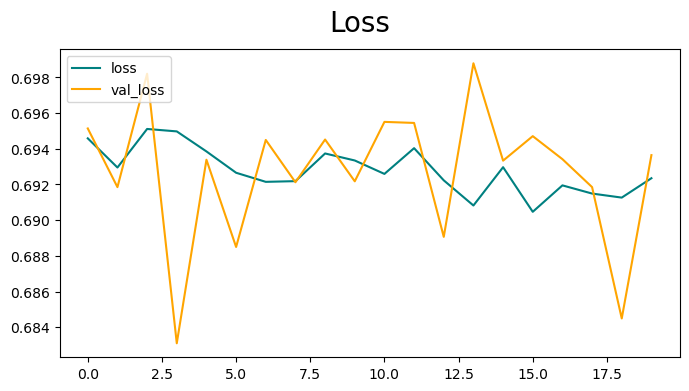

In [47]:
fig = plt.figure(figsize=(8,4))
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


**My model is not abel to learn or reduce loss for the data provided. (byes problem)**
- the lose is not going down, so it looks like I need more data

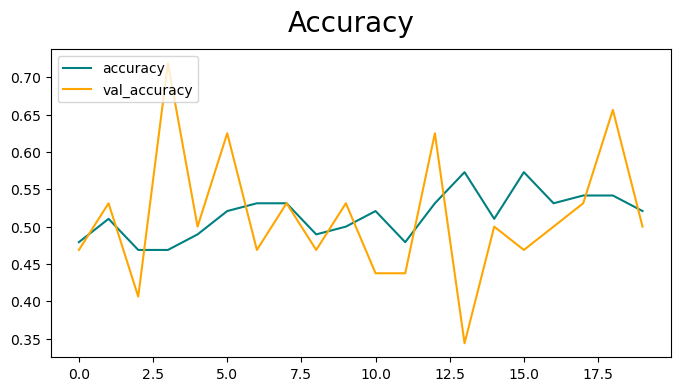

In [48]:
fig = plt.figure(figsize=(8,4))
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [50]:
# Create instances of precision, recall, and binary accuracy metrics
pre = Precision()    # Precision metric
re = Recall()        # Recall metric
acc = BinaryAccuracy()  # Binary Accuracy metric

# Loop through batches in the 'test' dataset
for batch in test.as_numpy_iterator(): 
    X, y = batch  # Get input data 'X' and corresponding labels 'y'
    yhat = model.predict(X)  # Predictions from the model for the input data 'X'
    
    # Update the metric states with the true labels 'y' and predictions 'yhat'
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-08-26 23:10:37.229729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 181ms/step


In [51]:
# Print the results of precision, recall, and binary accuracy metrics
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Binary Accuracy:", acc.result().numpy())

Precision: 0.6333333
Recall: 1.0
Binary Accuracy: 0.6333333


## Test

In [55]:
# img = cv2.imread('000019.jpg')
# plt.imshow(img)
# plt.show()

In [56]:
# resize = tf.image.resize(img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

In [57]:
# yhat = model.predict(np.expand_dims(resize/255, 0))
# yhat

In [58]:
# if yhat > 0.5: 
#     print(f'Predicted class is Sad')
# else:
#     print(f'Predicted class is Happy')

## Save model

In [ ]:
# model.save(os.path.join('models','imageclassifier.h5'))
# new_model = load_model('imageclassifier.h5')
# new_model.predict(np.expand_dims(resize/255, 0))